#  Neural Machine Translation by Jointly Learning to Align and Translate

## D. Bahdanau, K. Cho and Y. Bengio, 2015

#### 2771 citations

Also:

Luong et al., 2015:
Effective Approaches to Attention-based Neural Machine Translation

Judit Ács (BME AUT / MTA SZTAKI), judit@aut.bme.hu

https://github.com/juditacs/presentations/tree/master/dl_seminar/NMT.ipynb

 
# Recurrent neural networks

- neural networks with directed cycles

\begin{equation*}
h_t = f (x_t, h_{t-1})
\end{equation*}
\begin{equation*}
c = q ({h_1, \dots , h_{T_x}})
\end{equation*}

- $x_t$: input at timestep $t$
- $h_t$: hidden state at timestep $t$
- $c$: output
- $f, q$: non-linear function (e.g. LSTM)

![img](https://cdn-images-1.medium.com/max/1600/0*c1L9jjcsASagk_Hu.png)
[source](https://towardsdatascience.com/introduction-to-recurrent-neural-network-27202c3945f3)

## Popular in natural language processing

### NER tagging

Named Entity Recognition

![POS tagging](https://www.depends-on-the-definition.com/wp-content/uploads/2017/10/many_to_many-945x489.png)
[source](https://www.depends-on-the-definition.com/guide-sequence-tagging-neural-networks-python/)

## Encoder-decoder architecture

- sentence to sentence
- machine translation or chatbots

![seq2seq](https://cdn-images-1.medium.com/max/1600/1*sO-SP58T4brE9EHazHSeGA.png)
[source](https://towardsdatascience.com/sequence-to-sequence-tutorial-4fde3ee798d8)

## Limitations of simple encoder-decoder

- fixed dimension thought vector
  - has to encode **everything** needed by the decoder
  - variable length input

## Attention

- learns to align and translate at the same time 
- use all encoder states/outputs instead of only the last one
- soft-lookup

\begin{align}
p(y_i|y_1, \dots , y_{i-1}, c_i) &= g(y_{i-1}, s_i, c_i) \\
s_i &= f(s_{i-1}, y_{i-1}, c_i) \\
c_i &= \sum_{j=1}^{T_x} \alpha_{ij} h_j \\
\alpha_{ij} &= \frac{\exp{(e_{ij})}}{ \sum_{k=1}^{T_x} \exp{ (e_{ik} } } \\
e_{ij} &= a(s_{i-1}, h_j)
\end{align}

![attention](fig/attention.png)

## Data

- English-French parallel corpora
- 348M words after preprocessing
- filter to 30,000 most common words
- max. 30/50 words-per-sentence

## Models

- bidirectional encoder, 2000 units
- decoder, 1000 units
- 80 sentence minibatches, SGD
- running time: 5 days
- beam search inference

![results](fig/bleu.png)

## Visualizing attention weights

- a side product of attention is a nice visualization

![weights](fig/attention_example.png)

In [1]:
import os
import re
from subprocess import Popen, PIPE
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib

import numpy as np

matplotlib.style.use('seaborn-poster')
matplotlib.pyplot.rcParams['font.size'] = 24
%matplotlib inline
plt.tight_layout(pad=2.4, w_pad=0.5, h_pad=1.0)

os.environ["MORPH_SEQ2SEQ"] = "/mnt/permanent/home/judit/projects/morph-seq2seq.pytorch/"

In [2]:
tok_re = re.compile('\[[^\]]+\]')

def tokenize_analyzed_word(word):
    matches = list(tok_re.finditer(word))
    if len(matches) == 0:
        return list(word)
    out = list(word[:matches[0].start()])
    
    for i, m in enumerate(matches):
        pat = word[m.start():m.end()]
        next_end = matches[i+1].start() if i<len(matches)-1 else len(word)
        after = word[m.end():next_end]
        out.append(pat)
        out.extend(list(after))
        
    return out
 
def plot_attention(word, exp_dir):
    s2s_path = os.environ["MORPH_SEQ2SEQ"]
    fn = os.path.join(s2s_path, exp_dir, 'attention_weights', word)
    p = Popen("echo {0} | python {1}/morph_seq2seq/inference.py --exp {1}/{2}".format(word, s2s_path, exp_dir),
             stdout=PIPE, shell=True)
    out = p.communicate()[0].decode("utf8")
    enc, dec = out.rstrip("\n").split("\t")
    enc = list(enc)
    dec = tokenize_analyzed_word(dec)
    with open(fn) as f:
        data = [
            list(map(float, line.split())) for line in f
        ]
        data = np.array(data)[:-1, :]
    fig = plt.figure(figsize=(10, 12))
    ax = fig.add_subplot(111)
    title = "{} -- {}".format("".join(enc), "".join(dec))
    ax.set_title(title[:100])
    cax = ax.matshow(data)
    ax.set_xticklabels([''] + enc, rotation=90)
    ax.set_yticklabels([''] + dec)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.grid(linewidth=.2)
    fig.colorbar(cax)

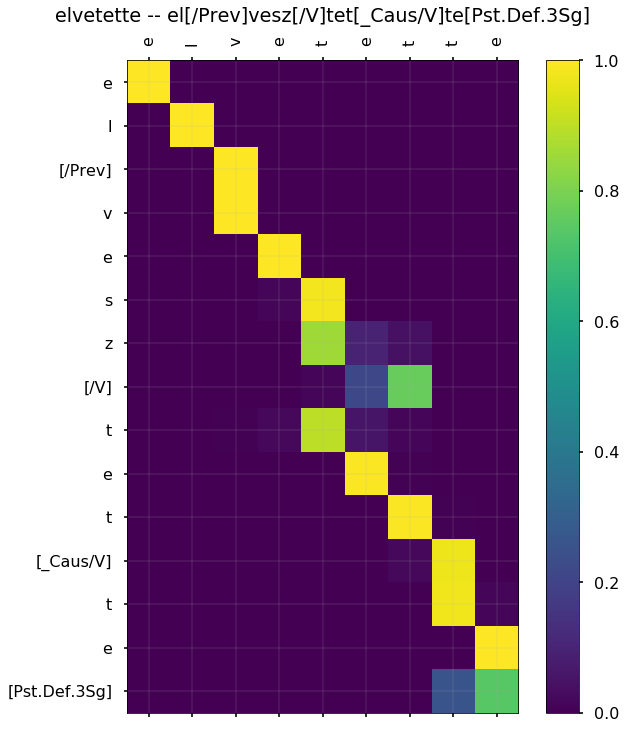

In [3]:
plot_attention("elvetette", "experiments/morph_ana_simplified/0014")

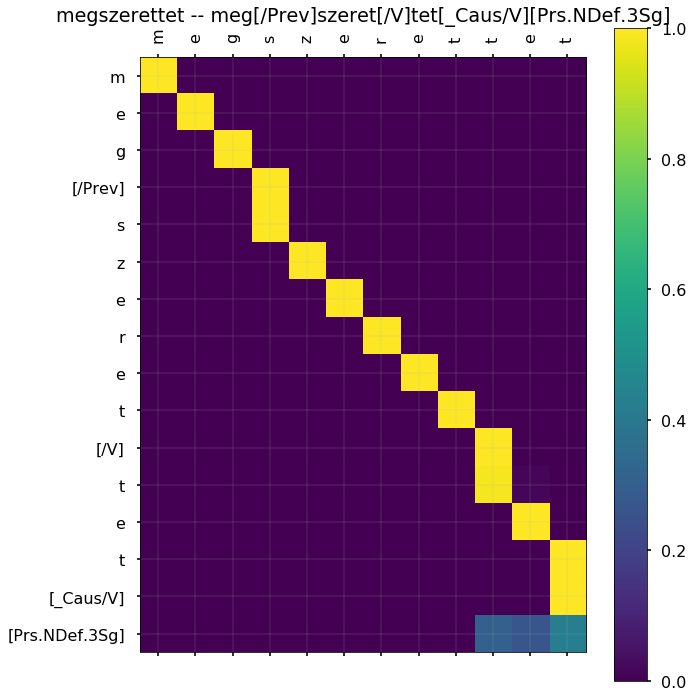

In [4]:
plot_attention("megszerettet", "experiments/morph_ana_simplified/0014")

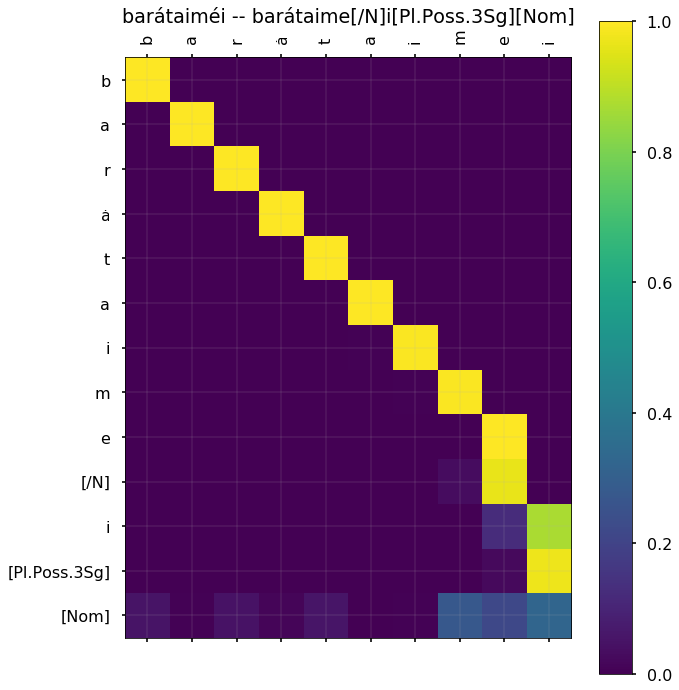

In [5]:
plot_attention("barátaiméi", "experiments/morph_ana_simplified/0014")

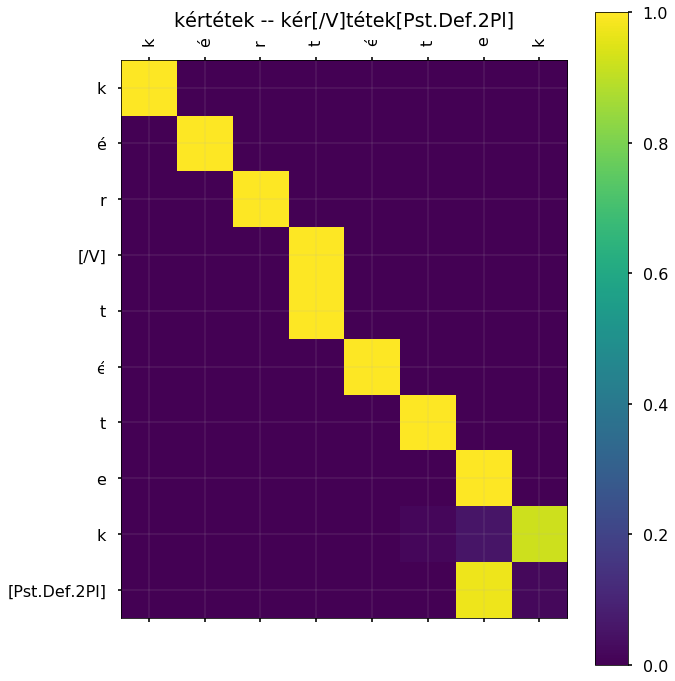

In [6]:
plot_attention("kértétek", "experiments/morph_ana_simplified/0014")

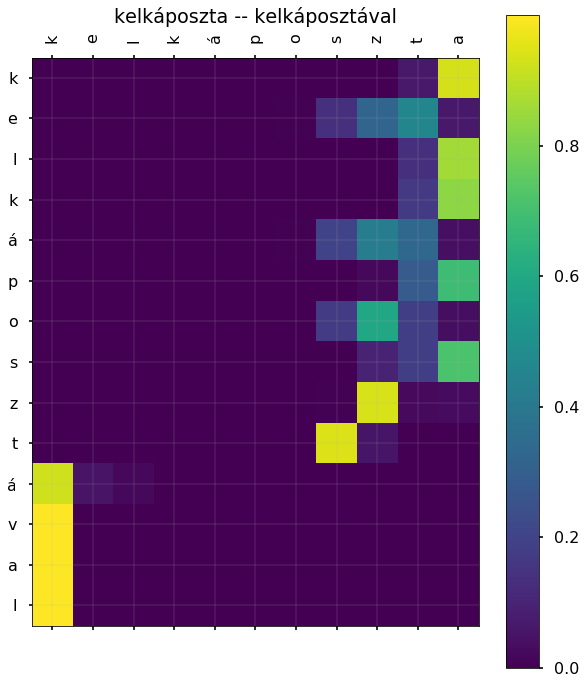

In [10]:
plot_attention("kelkáposzta", "experiments/instrumental/0008")

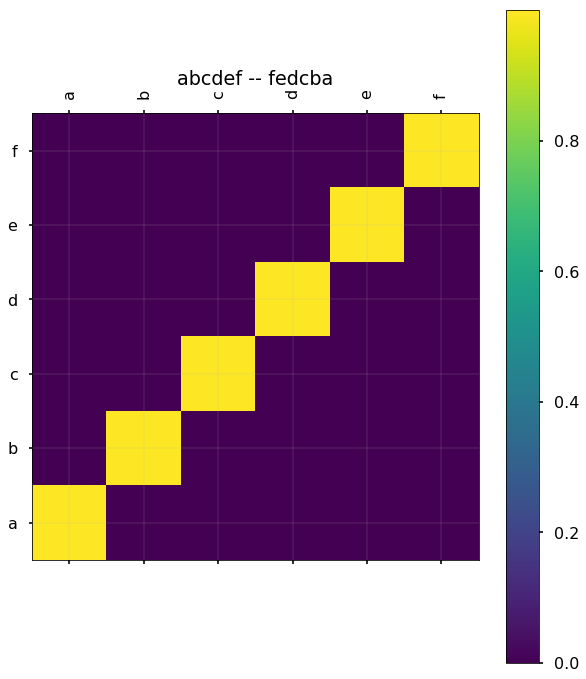

In [8]:
plot_attention("abcdef", "experiments/reverse/0000")

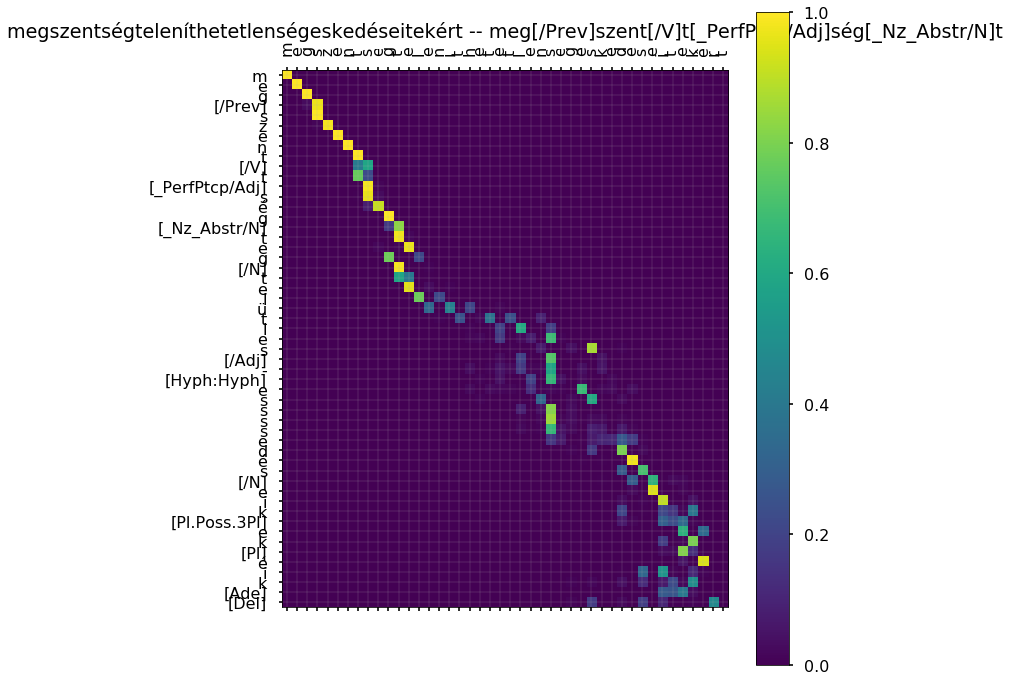

In [9]:
plot_attention("megszentségteleníthetetlenségeskedéseitekért", "experiments/morph_ana_simplified/0014")